Goals:


*   Upload dataset
*   Import libraries
*   Data exploration
*   Data cleaning
*   Data analysis
*   Visualization










Import Libraries

In [50]:
import pandas as pd #manipulate dataframe
import numpy as np #manipulate arrays
import matplotlib.pyplot as plt #Plot basic visuals
import seaborn as sns #plotting library
import plotly.express as px #Plots of higher quality
from sklearn.preprocessing import LabelEncoder #Encode features to make them numerical for ML or statistical analysis

# PART 1: Let's explore the dataset

In [51]:
df = pd.read_csv('Video_Games.csv')
df.head()
#From here start thinking about what kind of analysis you want to do.

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#Get the shape of the dataframe (rows, columns)
df.shape


(16928, 17)

In [53]:
# Get information about the dataframe: missing values; type of columns...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

In [54]:
# Gives us the sum of all the null values
df.isnull().sum()

,0
index,0
Name,2
Platform,0
Year_of_Release,273
Genre,2
Publisher,55
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


# How many games have both critic and user scores available?

In [55]:
# Display the count of games with both critic and user scores available.
games_with_scores = df[['Critic_Score', 'User_Score']].dropna()
games_with_scores_count = games_with_scores.shape[0]
games_with_scores_count
# Notice we removed the null values

8222

In [56]:
# Descriptive statistics of the datset (only numerical values)
df.describe()

,index,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16928.000000,16655.00000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,8260.000000,8260.000000,7718.000000
mean,8463.500000,2006.48532,0.266390,0.146850,0.078170,0.047861,0.539520,69.037893,26.428692,163.269629
std,4886.837014,5.88289,0.814326,0.504585,0.308756,0.186675,1.550545,13.943198,18.989929,562.786746
min,0.000000,1980.00000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,4231.750000,2003.00000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,8463.500000,2007.00000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,25.000000
75%,12695.250000,2010.00000,0.240000,0.110000,0.040000,0.040000,0.490000,79.000000,36.000000,82.000000
max,16927.000000,2020.00000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


# Second, let's ask some relevent analysis questions to work on:




*   What publishers have the higher global_sales?
*   What Platforms have the higher global_sales?
*   What Genre have the higher global_sales?
*   What features correlates with high user_score?







In [57]:
# This is code below but commented out. It is used if you want to see the whole dataset without it collaspsing.
#pd.set_optiion("display.max_rows", None)
#df

# What publishers have the higher global_sales?

missing_values:
 Publisher       55
Global_Sales     0
dtype: int64
Top Publishers by Global Sales:
 Publisher
Nintendo                        1830.35
Electronic Arts                 1155.88
Activision                       742.39
Sony Computer Entertainment      634.45
Ubisoft                          493.05
Take-Two Interactive             406.92
THQ                              342.74
Konami Digital Entertainment     284.90
Sega                             275.89
Namco Bandai Games               260.85
Name: Global_Sales, dtype: float64


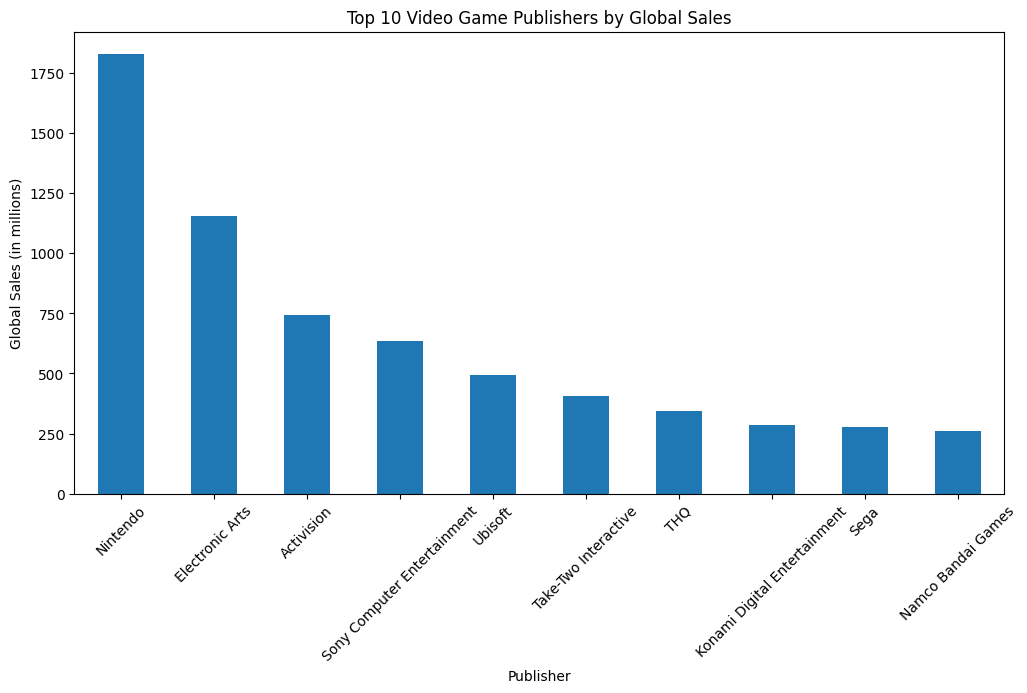

In [58]:
# Checking for missing values in 'Publisher' and 'Global_Sales' columns
missing_values = df[['Publisher', 'Global_Sales']].isnull().sum()
print("missing_values:\n", missing_values)

#Exclude rows with mising publisher information
video_games_cleaned_df = df.dropna(subset=['Publisher'])

#Aggregate global sales by publisher
publisher_sales = video_games_cleaned_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

#Display the top 10 publishers by global sales
top_publishers = publisher_sales.head(10)
print("Top Publishers by Global Sales:\n", top_publishers)

#Visualization
plt.figure(figsize=(12,6))
top_publishers.plot(kind='bar')
plt.title('Top 10 Video Game Publishers by Global Sales')
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Publisher')
plt.xticks(rotation=45)
plt.show()

# What Platforms have the higher global_sales?

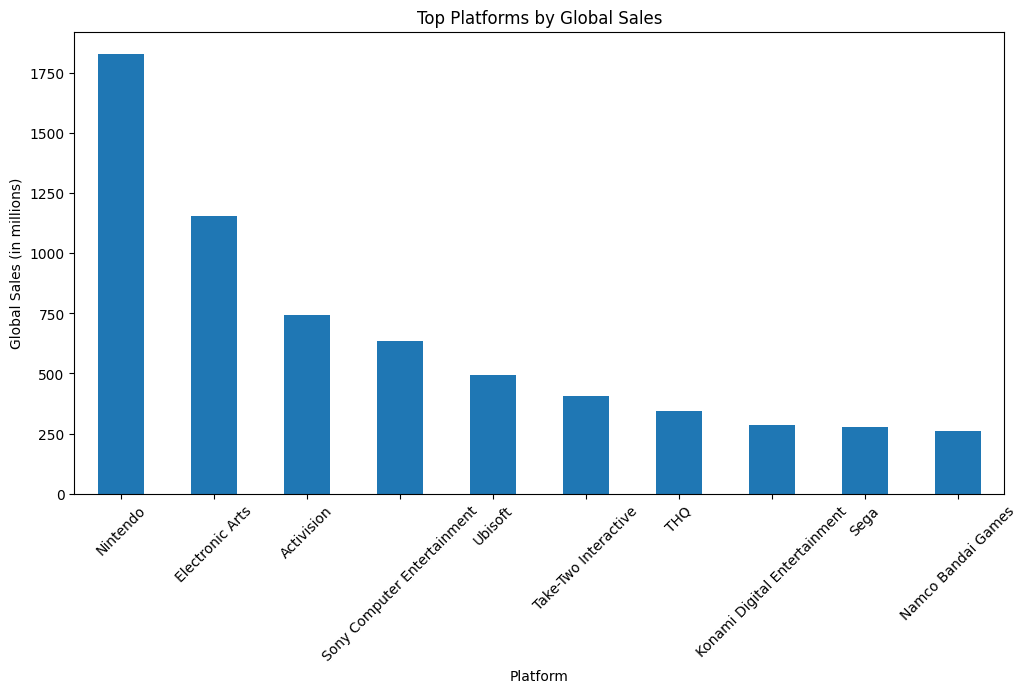

(Platform        0
 Global_Sales    0
 dtype: int64,
 Platform
 PS2     1279.87
 X360     988.31
 PS3      962.16
 Wii      936.92
 DS       813.61
 PS       758.29
 PS4      324.48
 GBA      318.90
 PSP      297.84
 3DS      271.19
 Name: Global_Sales, dtype: float64)

In [59]:
# Checking for missing values in 'Platform' and 'Global_Sales' columns
missing_values_platform = video_games_cleaned_df[['Platform', 'Global_Sales']].isnull().sum()


#Aggregate global sales by publisher
platform_sales = video_games_cleaned_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

#Display the top platforms by global sales
top_platforms = platform_sales.head(10)


#Visualization
plt.figure(figsize=(12,6))
top_publishers.plot(kind='bar')
plt.title('Top Platforms by Global Sales')
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.show()

#Output the results
missing_values_platform, top_platforms

# What Genre have the higher global_sales?

In [60]:
# Checking for missing values in 'Genre' and 'Global_Sales' columns
missing_values_genre = video_games_cleaned_df[['Genre', 'Global_Sales']].isnull().sum()


#Aggregate global sales by genre
genre_sales = video_games_cleaned_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

#Display the top genres by global sales
top_genres = genre_sales.head(10)


#Visualization using Plotly (notice this is different from the above two sections)
fig = px.bar(top_genres,
             x=top_genres.index,
             y=top_genres.values,
             title='Top Genres by Global Sales',
             labels={'x': 'Genre', 'y': 'Global Sales (in millions)'})
fig.show()



What features correlates with high user_score?


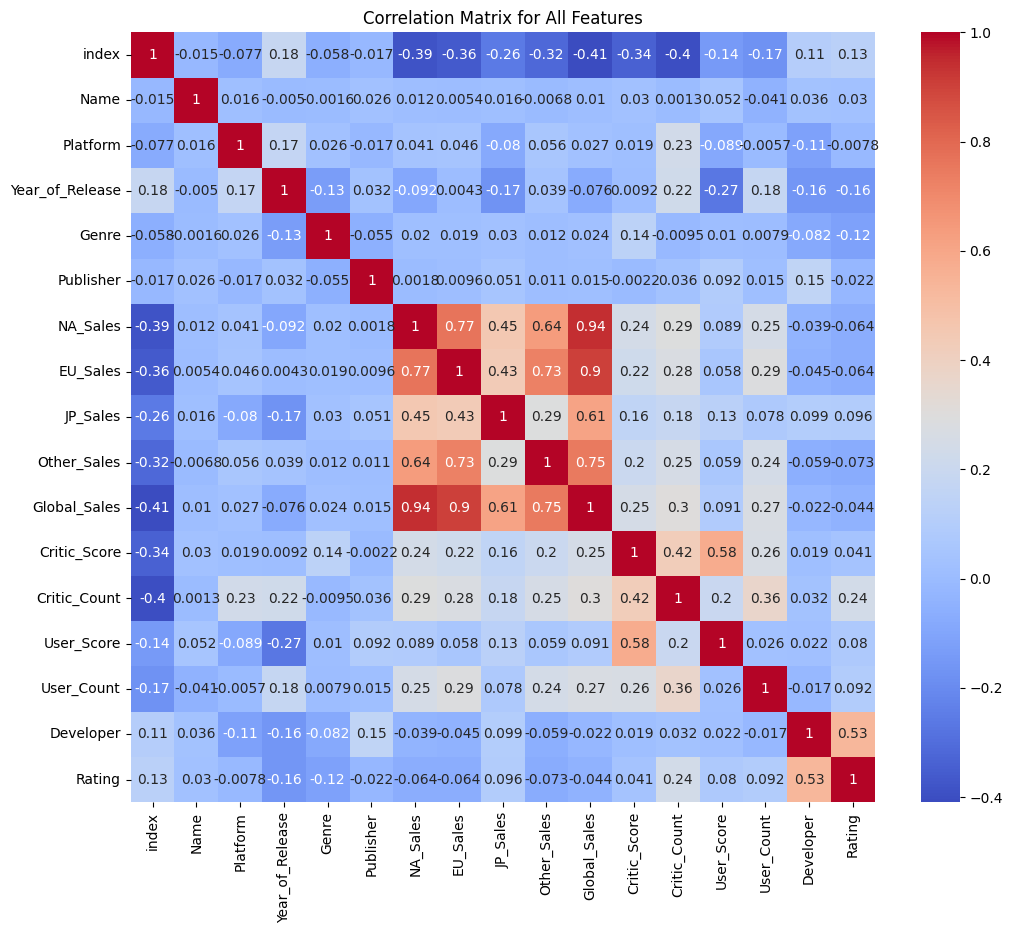

In [61]:

# Convert 'User_Score' to numeric, treating 'tbd' as NaN
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Initialize LabelEncoder
le = LabelEncoder()

# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the column is of object type (categorical)
    if df[column].dtype == 'object':
        # Convert object type columns to category type
        df[column] = df[column].astype('category')
        # Apply Label Encoding on categorical columns
        df[column] = le.fit_transform(df[column].cat.codes.replace(-1, np.nan))

# All of the above is so that we can have all features in numerical form and now we are able to calculate the correlation matrix.

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualization of the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for All Features')
plt.show()








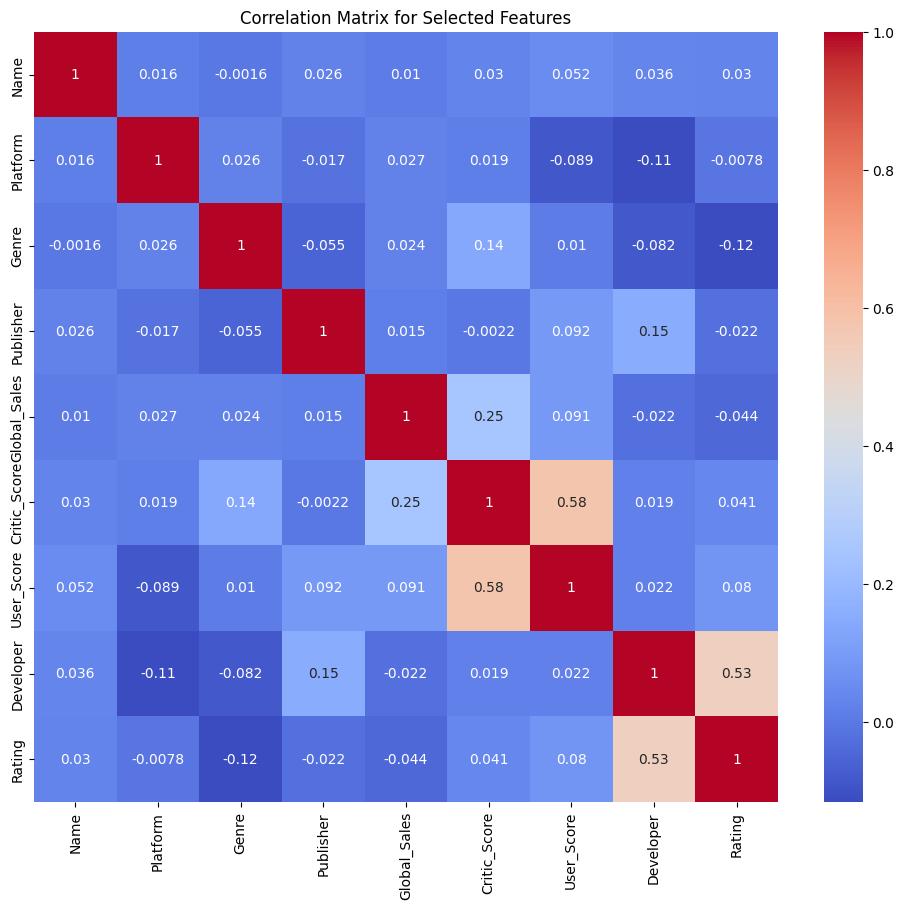

In [62]:
# Select only the specified columns
selected_columns = ['Name', 'Platform', 'Genre', 'Publisher', 'Global_Sales', 'Critic_Score','User_Score', 'Developer', 'Rating']
df = df[selected_columns]

#Convert 'User_Score' to numeric, treating 'tbd' as Nan
df['User_Score'] = pd.to_numeric(df['User_Score'], errors = 'coerce')

#Initialize LabelEncoder
le = LabelEncoder()

# Loop through each column in the DataFrame
for column in df.columns:
  # Check if the column is of object type (categorical)
  if df[column].dtype == 'object':
    #Convert object type columns to category type
    df[column] = df[column].astype('category')
    #Apply Label Encoding on categorial columns
    df[column] = le.fit_transform(df[column].cat.codes.replace(-1, np.nan))

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualization of the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Features')
plt.show()

We found that user_score only correlates with critic_score with 0.58.  While there is no much correlation with other features.

PART 2:

1. Trends Over Time: Examine how video game sales have changed over the years. Identify periods of significant growth or decline.
2. Regional Preferences: Compare the popularity of genres or platforms across different regions (NA, EU, JP, etc).
3. Correlation Between Critic and User Scores: Explore how closley user opinions align with proffesional critics.
4. Machine Learning Applications:
  4.1 - Sales Prediction Models: Use machine learning to predict future sales based on various features.
  4.2 - Recommendation Systems: Develop a system to recommend games to users based on their preferences or similar user profiles.

**1. Trends Over Time: Examine how video game sales have changed over the years. Identify periods of significant growth or decline.**

#PART 2


1. Trends Over Time: Examine how video game sales have changed over the years. Identify periods of significant growth or decline.

2. Regional Preferences: Compare the popularity of genres or platforms across different regions (NA, EU, JP, etc.).

3. Correlation Between Critic and User Scores: Explore how closely user opinions align with professional critics.

4. Machine Learning Applications:

  4.1- Sales Prediction Models: Use machine learning to predict future sales based on various features.

  4.2- Recommendation Systems: Develop a system to recommend games to users based on their preferences or similar user profiles.


  **NOTE: I am starting with the original data set, not the one modified in PART 1. This is important bc otherwise the code won't work.**

**1.Trends Over Time: Examine how video game sales have changed over the years. Identify periods of significant growth or decline.**

/tmp/ipython-input-35491417.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



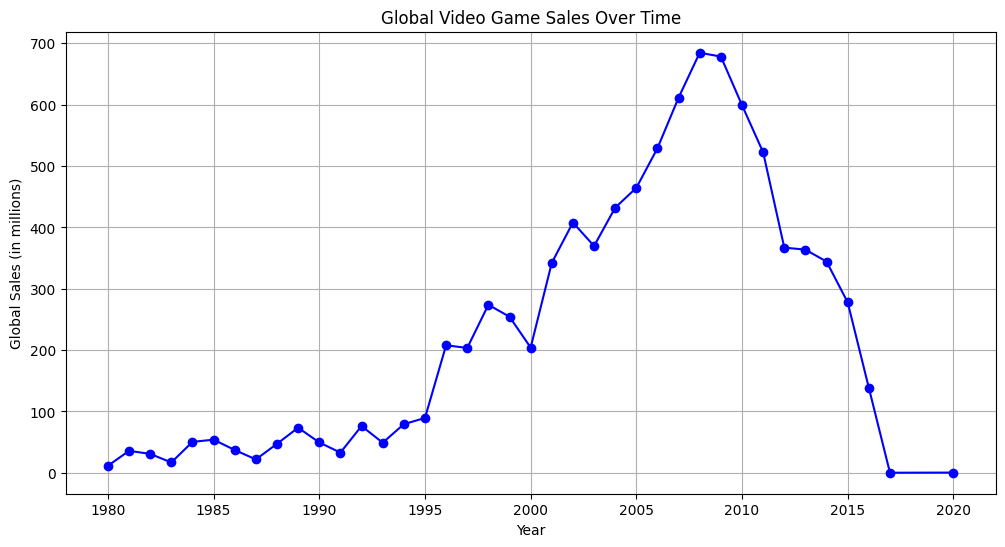

In [68]:
df = pd.read_csv('Video_Games.csv')
# Filter out rows where 'Year_of_Release' is NaN
video_games_df_filtered = df.dropna(subset=['Year_of_Release'])

# Convert 'Year_of_Release' to integer as it represents years
video_games_df_filtered['Year_of_Release'] = video_games_df_filtered['Year_of_Release'].astype(int)

# Aggregate global sales by year
yearly_sales = video_games_df_filtered.groupby('Year_of_Release')['Global_Sales'].sum()

# Plotting the time series of global sales
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='line', color='blue', marker='o')
plt.title('Global Video Game Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.show()


The line graph above illustrates the global video game sales trends over time, from 1980 to 2020. Here are some observations:



*   Growth Periods: There's a noticeable growth in sales starting in the     mid-1990s, peaking around 2008.
*   Peak Sales: The highest global sales occurred in 2008.
*   Decline in Sales: After 2008, there's a consistent decline in global sales.
*   Recent Years: The dataset includes very limited data for years after 2016, which explains the low sales figures for 2017 and 2020.


This analysis highlights key periods in the video game industry, particularly the rapid growth phase in the early 2000s and the subsequent decline after 2008. The decline could be attributed to various factors such as market saturation, the rise of mobile gaming, changes in consumer preferences, or even incomplete data for recent years.

**2. Regional Preferences: Compare the popularity of genres or platforms across different regions (NA, EU, JP, etc.).**

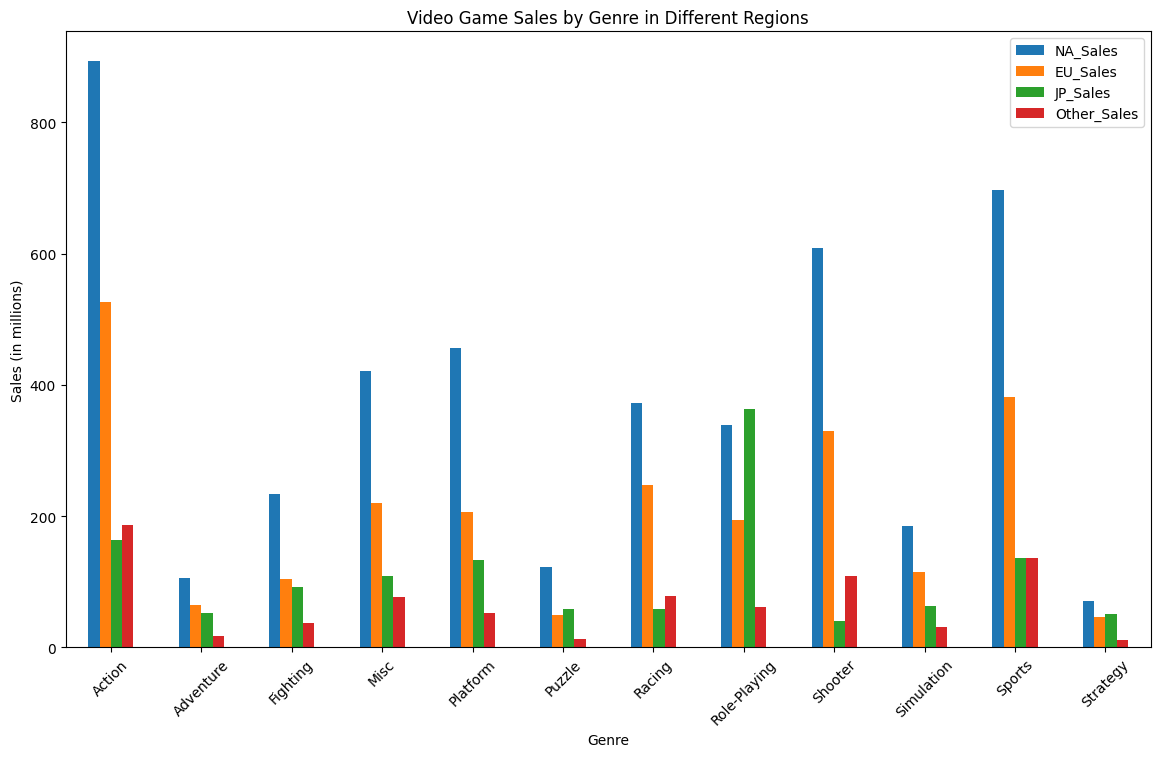

In [69]:
# Aggregating sales by region and genre
region_genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plotting the sales by region and genre
region_genre_sales.plot(kind='bar', figsize=(14, 8))
plt.title('Video Game Sales by Genre in Different Regions')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

Regional Insights:


*   North America (NA): NA has the highest sales in most genres, indicating a large market for video games. Action, Shooter, and Sports genres are particularly popular.
*   Europe (EU): Similar to NA, EU also shows a strong preference for Action and Shooter games, with Sports also being popular.
*   Japan (JP): Japan stands out with its high sales of Role-Playing games, which is a cultural preference. Other genres like Action and Platform also do well.
*   Other Regions: The sales pattern in Other regions seems to follow NA and EU trends but at a lower scale.





**3. Correlation Between Critic and User Scores: Explore how closely user opinions align with professional critics.**

/tmp/ipython-input-1783599889.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1783599889.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



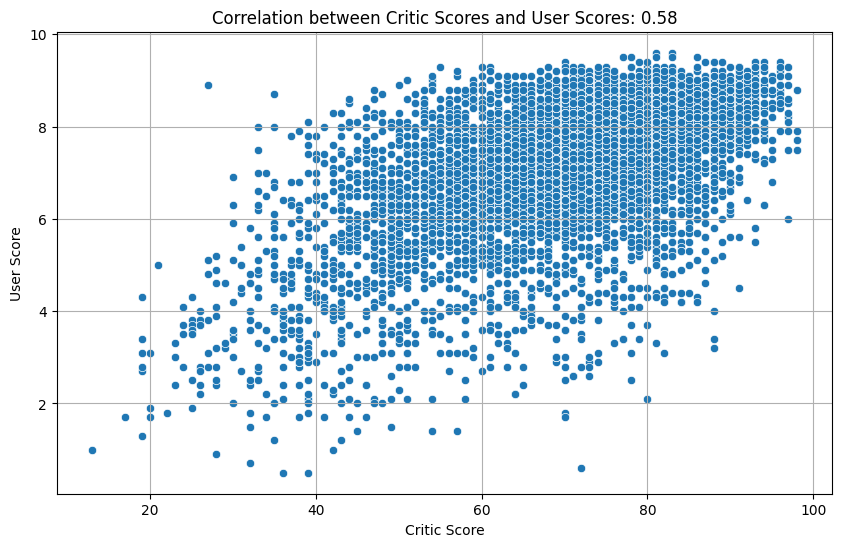

In [70]:
# Filter out rows where either 'Critic_Score' or 'User_Score' is NaN
video_games_scores_df = df.dropna(subset=['Critic_Score', 'User_Score'])

# Convert 'User_Score' to numeric, if it's not already
video_games_scores_df['User_Score'] = pd.to_numeric(video_games_scores_df['User_Score'], errors='coerce')

# Drop any rows that still have NaN values after conversion
video_games_scores_df.dropna(subset=['User_Score'], inplace=True)

# Calculate the correlation coefficient
correlation = video_games_scores_df['Critic_Score'].corr(video_games_scores_df['User_Score'])

# Visualize the relationship between Critic Scores and User Scores using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Critic_Score', y='User_Score', data=video_games_scores_df)
plt.title(f'Correlation between Critic Scores and User Scores: {correlation:.2f}')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.grid(True)
plt.show()

**4. Machine Learning Applications:**

4.1- Sales Prediction Models: Use machine learning to predict future sales based on various features.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Select features for prediction and the target variable
features = df[['Platform', 'Genre', 'Publisher', 'Critic_Score', 'User_Score']].copy()
target = df['Global_Sales']

# Handle missing values by imputation or dropping
features['User_Score'] = pd.to_numeric(features['User_Score'], errors='coerce')
features_clean = features.dropna()  # Dropping rows with missing values
target_clean = df.loc[features_clean.index, 'Global_Sales']  # Ensure target aligns with features

# Convert categorical variables using One-Hot Encoding
categorical_features = ['Platform', 'Genre', 'Publisher']
numerical_features = ['Critic_Score', 'User_Score']

# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the preprocessing and training pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_clean, target_clean, test_size=0.2, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error (MSE): 3.300922126458361
Root Mean Squared Error (RMSE): 1.816844001684889


4.2- Recommendation Systems: Develop a system to recommend games to users based on their preferences or similar user profiles.

In [72]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


# Fill NaN values with the string 'missing' in the categorical columns
df['Genre'].fillna('missing', inplace=True)
df['Platform'].fillna('missing', inplace=True)
df['Publisher'].fillna('missing', inplace=True)

# Create a combined feature by concatenating the string representations of 'Genre', 'Platform', and 'Publisher'
df['combined_features'] = (df['Genre'] + " " + df['Platform'] + " " + df['Publisher']).astype(str)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on a game the user likes
def get_recommendations(title, cosine_sim=cosine_sim):
    # Check if the title exists in the DataFrame
    if title not in df['Name'].values:
        return f"No recommendations found for '{title}' as it's not in the dataset."

    # Get the index of the game that matches the title
    idx = df.index[df['Name'] == title].tolist()[0]

    # Get the pairwise similarity scores of all games with that game
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the games based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar games
    sim_scores = sim_scores[1:11]

    # Get the game indices
    game_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar games
    return df['Name'].iloc[game_indices]

# Define sample titles for testing the recommendation system
# this will select the first 5 games in the dataset and recommend similar games
sample_titles = df['Name'].dropna().unique()[:5]

# Testing the recommender with the sample titles
for title in sample_titles:
    print(f"Recommendations for {title}:")
    recommendations = get_recommendations(title)
    print(recommendations)
    print("\n")


/tmp/ipython-input-871262422.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-871262422.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

Recommendations for Wii Sports:
3                           Wii Sports Resort
13                                    Wii Fit
15                               Wii Fit Plus
591                    Mario Strikers Charged
809                          Mario Sports Mix
911                      Mario Super Sluggers
1307     New Play Control! Mario Power Tennis
6364                              Punch-Out!!
7184                         Super Swing Golf
12181                            Mario Tennis
Name: Name, dtype: object


Recommendations for Super Mario Bros.:
22                     Super Mario Bros. 3
98                     Super Mario Bros. 2
574     Super Mario Bros.: The Lost Levels
698                            Mario Bros.
997                             Kid Icarus
1010                     Kirby's Adventure
1192                  Donkey Kong Classics
1262                           Ice Climber
1809                           Donkey Kong
1843                       Donkey Kong Jr.
Name: Name,

This recommends games based on a sample of titles from the dataset

In [73]:
print(df['Name'].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
